In [190]:
import torch
from torch.utils.data import Dataset
import numpy as np
import processing
from torch.utils.data import random_split
import matplotlib.pyplot as plot
import cv2
from scipy.ndimage import gaussian_filter

# Reading raw data

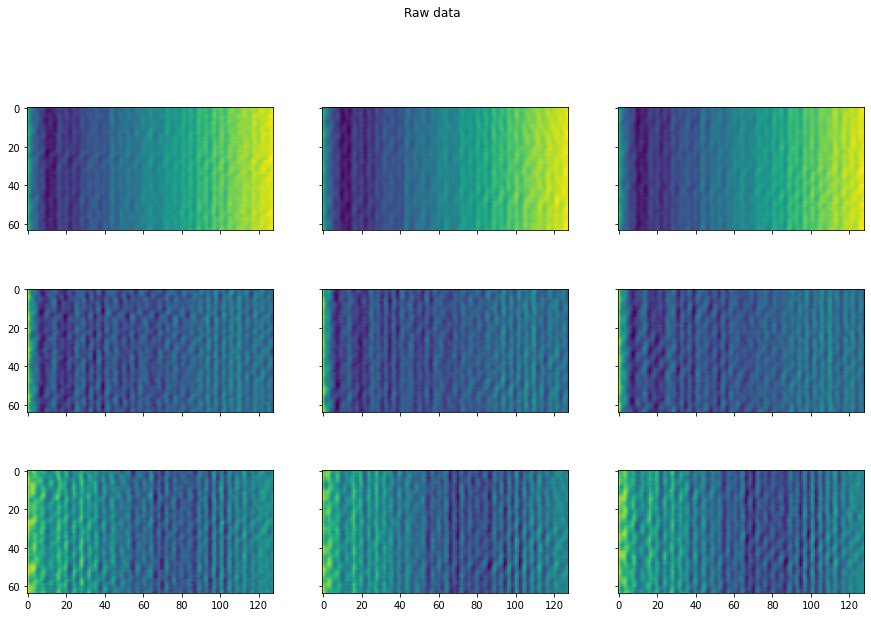

In [191]:
recordings = [
    {'title': 'recording_2022_05_25_11_55_19', 'start': 200, 'end': 500, 'label': 0},  # 0 people
    {'title': 'recording_2022_05_25_11_46_26', 'start': 200, 'end': 500, 'label': 1},  # 1 person
    {'title': 'recording_2022_05_25_11_47_20', 'start': 200, 'end': 500, 'label': 2},  # 2 people
    {'title': 'recording_2022_05_25_11_48_56', 'start': 200, 'end': 500, 'label': 3},  # 3 people
    {'title': 'recording_2022_05_25_19_06_11', 'start': 50, 'end': 1500, 'label': 0},  # 0 people
    {'title': 'recording_2022_05_25_19_07_53', 'start': 20, 'end': 2700, 'label': 1},  # 1 person
    {'title': 'recording_2022_05_25_19_10_22', 'start': 20, 'end': 3300, 'label': 2},  # 2 people
    {'title': 'recording_2022_05_25_19_13_55', 'start': 110, 'end': 3300, 'label': 3},  # 3 people
]
recording = recordings[7]
file_name = f'../recordings/{recording["title"]}/RadarIfxAvian_00/radar.npy'
data = np.load(file_name)
start_frame, end_frame, labelix = recording["start"], recording["end"], recording["label"]
data = data[start_frame:end_frame]

fig, axs = plot.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Raw data')
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(np.abs(data)[j, i, :, :])
        axs[i, j].set_aspect('equal')
plot.subplots_adjust(hspace=0)

# Processing

In [192]:
processed_data = processing.processing_rangeDopplerData(data)
processed_data = np.abs(processed_data)

processed_data[:, :, 32:34, :] = 0  # Remove the middle band (noise?)

for i in range(len(processed_data)):
    for j in range(len(processed_data[i])):
        processed_data[i, j] -= processed_data[i, j].mean()  # subtract the mean
        processed_data[i, j] = gaussian_filter(processed_data[i, j], (1, 1))  # Gaussian blur

processed_data[:, :, :, 45:] = 0  # Remove far away objects
processed_data *= 1.0 / processed_data.max()  # Normalize

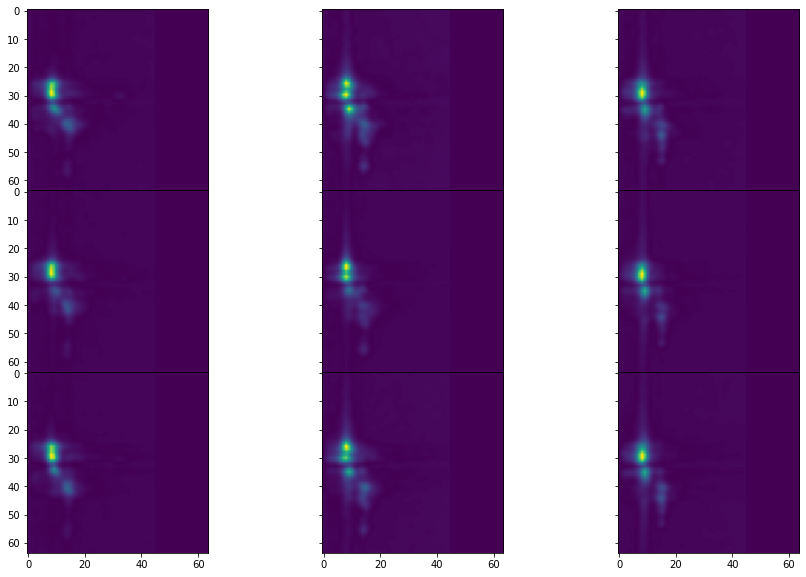

In [193]:
processed_data = processed_data[100:200]

ig, axs = plot.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Raw data')
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(np.abs(processed_data)[j, i, :, :])
        axs[i, j].set_aspect('equal')
        axs[i, j].grid(False)
plot.subplots_adjust(hspace=0)